# Hochschule Bonn-Rhein-Sieg

# Probabilistic Reasoning, WS21

# Assignment 01


Instructions for submission :
- Please restart and run all cells before submitting 
- Make sure your user name is correct
- No need to submit a pdf file, only the ipython is sufficient

Good luck !!

### Student user name: nmursa2s


In [1]:
#Some of the libraries that might be useful.
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats 
%matplotlib inline

## Excercise 01 (10 points)
The purpose of this exercise is to understand the shapes of different distributions.

Please use python, scipy , matplolib and try to create **"Aesthetic"** plots following distributions (continuous / discrete) from scipy package in a single plot.

Note: Do it pythonic way (minimum code ), Use loops etc. 

Plot the following using variables and a  scale you think is appropriate. The sole purpose is to familiarize yourself with the shape of the distributions.

- Discrete distribution: Bernouli , Binomial , Hypergeometric , Possion

- Continuous distributions : Normal , Expotential , Gamma , Uniform

<!-- ![](https://www.palisade.com/images3/product/risk/en/6_NewDistFunctions.png).
 -->

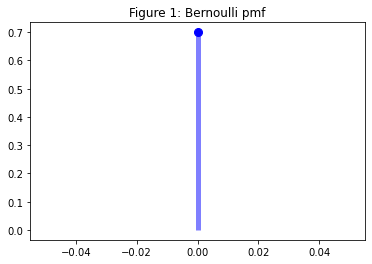

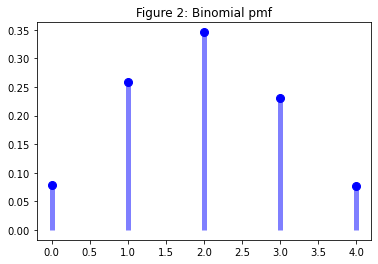

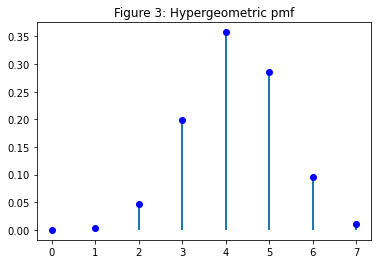

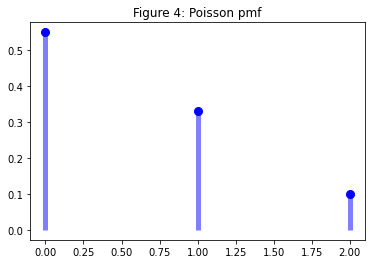

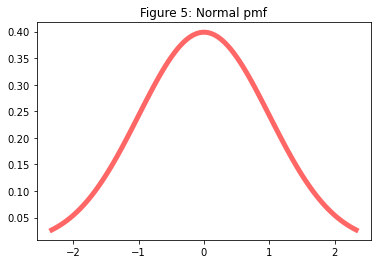

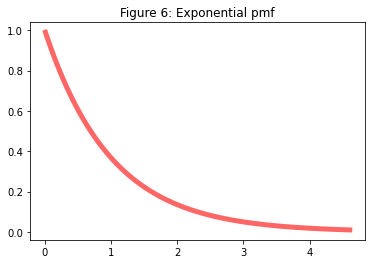

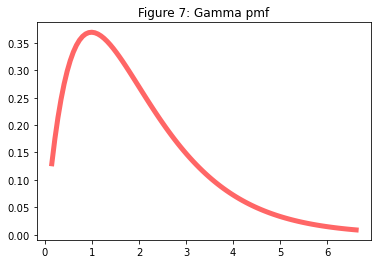

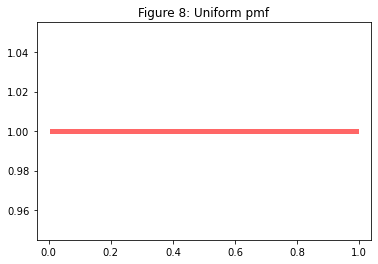

In [2]:
# Your answer here
# we need to use all of them from each discrete and continious 
# scipy stats.html
from scipy.stats import bernoulli, binom, hypergeom,gausshyper, poisson, norm, expon, gamma, uniform

fig, ax = plt.subplots(1,1)
p = 0.3
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')
x = np.arange(bernoulli.ppf(0.01, p),
              bernoulli.ppf(0.99, p))
ax.plot(x, bernoulli.pmf(x, p), 'bo', ms=8, label='bernoulli pmf')
ax.vlines(x, 0, bernoulli.pmf(x, p), colors='b', lw=5, alpha=0.5)
ax.set(title="Figure 1: Bernoulli pmf")
fig, ax = plt.subplots(1,1)
n, p = 5, 0.4
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
ax.set(title="Figure 2: Binomial pmf")

#fig, ax = plt.subplots(1,1)
[M, n, N] = [20, 7, 12]
rv = hypergeom(M, n, N)
x = np.arange(0, n+1)
pmf_dogs = rv.pmf(x)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, pmf_dogs, 'bo')
ax.vlines(x, 0, pmf_dogs, lw=2)
ax.set(title="Figure 3: Hypergeometric pmf")
plt.show()
# a, b, c, z = 13.8, 3.12, 2.51, 5.18
# mean, var, skew, kurt = hypergeom.stats(a, b, c, z, moments='mvsk')
# x = np.linspace(hypergeom.ppf(0.01, a, b, c, z),
#                 hypergeom.ppf(0.99, a, b, c, z), 100)
# ax.plot(x, hypergeom.pdf(x, a, b, c, z),
#        'r-', lw=5, alpha=0.6, label='hypergeom pdf')
ax.set(title="Figure 3: Hypergeometric pmf")

fig, ax = plt.subplots(1,1)
mu = 0.6
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
x = np.arange(poisson.ppf(0.01, mu),
              poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
ax.set(title="Figure 4: Poisson pmf")

#continious distributions
fig, ax = plt.subplots(1,1)
mean, var, skew, kurt = norm.stats(moments='mvsk')
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')
ax.set(title="Figure 5: Normal pmf")

fig, ax = plt.subplots(1,1)
mean, var, skew, kurt = expon.stats(moments='mvsk')
x = np.linspace(expon.ppf(0.01),
                expon.ppf(0.99), 100)
ax.plot(x, expon.pdf(x),
       'r-', lw=5, alpha=0.6, label='expon pdf')
ax.set(title="Figure 6: Exponential pmf")
fig, ax = plt.subplots(1,1)
a = 1.99
mean, var, skew, kurt = gamma.stats(a, moments='mvsk')
x = np.linspace(gamma.ppf(0.01, a),
                gamma.ppf(0.99, a), 100)
ax.plot(x, gamma.pdf(x, a),
       'r-', lw=5, alpha=0.6, label='gamma pdf')
ax.set(title="Figure 7: Gamma pmf")
fig, ax = plt.subplots(1,1)
mean, var, skew, kurt = uniform.stats(moments='mvsk')
x = np.linspace(uniform.ppf(0.01),
                uniform.ppf(0.99), 100)
ax.plot(x, uniform.pdf(x),
       'r-', lw=5, alpha=0.6, label='uniform pdf')
ax.set(title="Figure 8: Uniform pmf")
plt.show()

## Exercise 02 (30 Points)

In order to better understand most of the concepts you learn in the course these 2 terms probability(Prior) and likelihood(conditional probability) has to be understood in deep.

It also defers from the discrete and continuous random variable case
In this exercise we will try to understand with python codes and examples.

First lets go through this video here from StatQuest. 
[Probability is not likelihood](https://www.youtube.com/watch?v=pYxNSUDSFH4)

Additional reading material:[Bayesian Updating with continuous priors](https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading13a.pdf)

Now you are clear about the difference between $Probability$ vs $likelihood$. 

Lets implement the rat example in python.
The rat data set has the following characteristics
- The weight distribution of the rat is a Normal Distribution
- The mean is 32 gms and standard deviation is 2.5
Given below is the plot of this distribution

1. Describe the following properties of the distribution plotted in "Figure 1: Rat Weight Distribution" 
    - What is ppf ?
    - Why did we take ppf 0.01 and 0.99 ?
    - What is pdf ?
    
2. Calculate the following and __plot the regions of interest__ in separate plots
    - What is probability that the a randomly selected mouse will weigh between 32 and 34 gms?i.e. $P( 32 < mouse\_weights < 34 | \mu = 32, \sigma = 0.25)$. Hint : Look at scipy.stats.norm.cdf function    
    - Calculate probability that the a randomly selected mouse will weigh greater than 34 gms?
    - What is the Likelihood that a randomly selected mouse will weigh 32 gms?





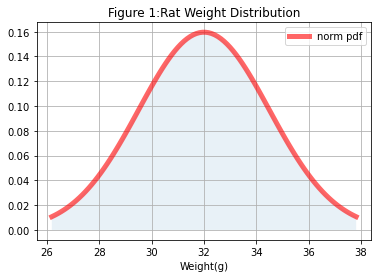

In [3]:
rat_distirbution = scipy.stats.norm(loc=32, scale=2.5) #loc corresponds to mean and scale corresponds to Standard deviation of normal distribution
fig1, ax1 = plt.subplots(1, 1)
x = np.linspace(rat_distirbution.ppf(0.01), rat_distirbution.ppf(0.99), 100)
ax1.plot(x, rat_distirbution.pdf(x),'r-', lw=5, alpha=0.6, label='norm pdf')
ax1.fill_between(x, rat_distirbution.pdf(x), where=x<40,alpha=0.1)
ax1.set(title="Figure 1:Rat Weight Distribution",xlabel="Weight(g)")
ax1.grid()
ax1.legend()


# 1 Your answer here 
## 1.1
According to scipy's documentation ppf is percent point function which is inverse of cdf. By using ppf we calculate the probability for given normal distribution value. if we use the method norm.ppf() we should use it with percentage value like norm.ppf(percentage) and it returns a standard deviation multiplier for what  value that percentage occurs at.

## 1.2
By taking the ppf 0.01 and 0.99 as we said in previous statement, by writing norm.ppf(0.01) and norm.ppf(0.99), we return 1% and 99% significance interval for a one-tail test on a standard normal distribution.

## 1.3
PDF is probabilistic density function and this function describes the relative probability of the values taken by the variable. Simply it is a statistical expression that defines a probability distribution for a discrete random variable as opposed to a continuous random variable.

In [4]:
# 2 Your answer here 
# we can say that P(32<mw<34) is equal to P(mw<34)-P(mw<32) = P(z<(34-31)/2.5) - P(z<(32-31)/2.5)
## according to video, P(weight between 32 and 34 grams | mean = 32 and std 2.5) is equal to 0.29
result = norm.cdf(34, 32, 2.5) - norm.cdf(32, 32, 2.5)
print(round(result, 2))
# We can find this by following formula -> P(mw>34 | 32<mw<34)
# we need to find P(mw<34) and then as a result we get 
## (P(mw<34)- P)/P(32<mw<34)
## but simply we can write 
result = 1 - norm.cdf(40, 32, 2.5)
print(round(result, 5))
## We can find likelihood as 
mu = 32
sigma = 2.5
rat_distirbution = scipy.stats.norm(loc=mu, scale=sigma)
result = rat_distirbution.pdf(34)
print(round(result, 2))

0.29
0.00069
0.12


## Exercise 03 (20 Points) 

A survey was conducted to see how long customers at Lucky supermarket claimed to wait in the checkout line until their turn. Let X = time in line.  Given below is the data collected. 

1. Calculate the sample mean and the sample standard deviation.
2. Construct a histogram. Use Sturge’s Rule to determine bin size [Bin Size](https://www.statisticshowto.com/choose-bin-sizes-statistics/)
3. Draw a smooth curve through the midpoints of the tops of the bars in the histogram and describe the shape of your histogram and smooth curve.
4. The distribution of X can e approximated by the sample mean approximate $\mu$ and the sample standard deviation approximate $\sigma$. X~ P($\mu$,$\sigma$), Find these values
5. Use the distribution in part Q4 to calculate the probability that a person will wait fewer than 6.1 minutes.
6. Use the distribution in part Q4 to calculate the likelihood that a person will wait 8.5 minutes?
7. Check the shape of continuous distributions you did in first assignment and replace the distribution in Q4 with any other suitable distribution. Plot this result on top of the histogram from Q2

In [5]:
X=[0.50,4.25,5.0,6.0,7.25,1.75,4.25,5.25,6.0,7.25,2.0,4.25,5.25,6.25,7.25,2.25,4.25,\
   5.5,6.25,7.75,2.25,4.5,5.5,6.5,8,2.5,4.75,5.5,6.5,8.25,2.75,4.75,5.75,6.5,9.5,\
   3.25,4.75,5.75,6.75,9.5,3.75,5.0,6.0,6.75,9.75,3.75,5.0,6.0,6.75,10.75]

In [6]:
# 1 Your answer here 
mean = np.mean(X)
std = np.std(X)
print(f"Mean is {mean} and deviation is {std}")

Mean is 5.51 and deviation is 2.124241040936739


7


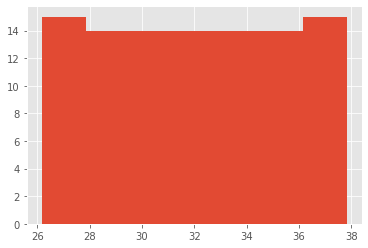

In [7]:
# 2 Your answer here 
K = 1+ 3.322* np.log10(len(X))
K = int(np.round(K))
print(K)
plt.style.use('ggplot')
plt.hist(x, bins=K)
plt.show()

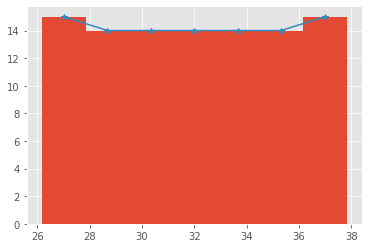

In [8]:
# 3 Your answer here 
K = 1+ 3.322* np.log10(len(X))
K = int(np.round(K))
y,edges = np.histogram(x, K)
plt.style.use('ggplot')
plt.hist(x, bins=K)
centers = 0.5*(edges[1:]+ edges[:-1])
plt.plot(centers,y,'-*')
plt.show()


In [9]:
# 4 Your answer here 
mean = np.mean(X)
std = np.std(X)
print(f"Mean is {mean} and deviation is {std}")

Mean is 5.51 and deviation is 2.124241040936739


In [10]:
# 5 Your answer here 
print(round(norm.cdf(6.1, mean, std), 2))

0.61


In [11]:
# 6 Your answer here 
print(round(norm.cdf(8.5, mean, std), 2))

0.92


In [12]:
# 7 Your answer here 

## Exercise 04: Random Variables and Conditional Probabilities (40 points)

Let's suppose that we have a very simple speech synthesis system that can only generate sequences of the letters \{ a, b, c, d \}. Based on the data we have used for training the system, we know that the prior probabilities of generating the letters are $P(a) = 0.1$, $P(b) = 0.4$, $P(c) = 0.2$, and $P(d) = 0.3$. This particular system works by generating letters one at a time; as only some letter combinations are considered valid words, generating letter $n$ affects the probabilities of generating letter $n+1$. In particular, we know that

$P(a|a) = 0.2 \hspace{2cm} P(b|a) = 0.1 \hspace{2cm} P(c|a) = 0.6 \hspace{2cm} P(d|a) = 0.1$

$P(a|b) = 0.4 \hspace{2cm} P(b|b) = 0.2 \hspace{2cm} P(c|b) = 0.1 \hspace{2cm} P(d|b) = 0.3$

$P(a|c) = 0.1 \hspace{2cm} P(b|c) = 0.2 \hspace{2cm} P(c|c) = 0.4 \hspace{2cm} P(d|c) = 0.3$

$P(a|d) = 0.4 \hspace{2cm} P(b|d) = 0.4 \hspace{2cm} P(c|d) = 0.2 \hspace{2cm} P(d|d) = 0.0$

Given that the letters from $1$ to $n-1$ don't affect the probabilities of generating the subsequent letters, we say that letter $n+1$ is *independent* of letters $1$ to $n-1$ given letter $n$. Let's illustrate this by an example: if the system has generated the sequence *bc*, the probability of generating *d* next, namely $P(d|b,c)$, will be equal to $P(d|c)$. The probabilities given above are thus all we need for investigating how this particular speech synthesis system works. (Note: The independence property will soon be explored in the lectures; for the purposes of this assignment, you should only understand its implications.)

1. How many four-letter sequences of \{ a, b, c, d \} are there?

2. What is the probability of generating the sequence *abcd*?

3. What is the most likely four-letter sequence that the system can generate? What is the least likely four-letter sequence?

4. Let us now define a random variable $X$ that counts the occurrences of a given letter in a two-letter sequence. Write the function $f$ defined below, which calculates $P(X)$, the probability mass function of $X$. Verify the results of your function by assuming that $X$ counts the number of *a*s in a two-letter sequence; for this case, calculate $P(X)$ by hand and make sure that your function returns the correct values.

    *Hint 1*: You should obtain the probabilities $P(X=0) = 0.6$, $P(X=1) = 0.38$, and $P(X=2) = 0.02$ for your test case

    *Hint 2*: Feel free to define any additional helper functions that might simplify your calculations

In [13]:
# in following section we will explain answers to 4 parts of the question 4
# so for the 1st part where we need to find four-letter sequences of {a,b,c,d}
# let say we have x_1, x_2, x_3, x_4 where x_i {a, b, c, d}
# so we can say we can have four-letter sequences by 4ˆ4 so it is 
print(4**4)

#for the second part, we can write 
# P(abcd) = P(a)*P(b|a)*P(c|b)*P(d|c) = 0.1*0.1*0.1*0.3 = 0.0003
print(f"P(abcd) = P(a)*P(b|a)*P(c|b)*P(d|c)= {round(0.1*0.1*0.1*0.3, 4)}")

#for the third part, as we see for the most liekly four-letter sequence will be bacc because of the probability values
#so we can calculate the probability like
# P(bacc)= P(b)*P(a|b)*P(c|a)*P(c|c) = 0.4*0.4*0.6*0.4=0.0384
print(f"most likely four-letter sequence is P(bacc)= P(b)*P(a|b)*P(c|a)*P(c|c) = {round(0.4*0.4*0.6*0.4, 4)}")
#to find the least likely four-letter sequence we can also do same thing we did for most-likely four letter
#let's generate a tree like following

#                           a
#                       b       d
#                       c       c
#                       a       d
#and then we can find which one's probabilty is least
# P(abca)= P(a)*P(b|a)*P(c|b)*P(a|c) = 0.1*0.1*0.1*0.1=0.0384
print(f"least likely four-letter sequence (1) is P(abca)= P(a)*P(b|a)*P(c|b)*P(a|c) = {round(0.1*0.1*0.1*0.1, 4)}")
#for another P(adcd) = P(a)*P(d|a)*P(c|d)*p(d|c)=0.1*0.1*0.2*0.3
print(f"least likely four-letter sequence (2) is P(adcd) = P(a)*P(d|a)*P(c|d)*p(d|c) = {round(0.1*0.1*0.2*0.3, 4)}")
#as we see the first one is least one

def f(priors, conditionals, letter_idx):
    p_x = np.array([0., 0., 0.])
    ### Write your code here ###
    return p_x

letters = ['a', 'b', 'c', 'd']
priors = np.array([0.1, 0.4, 0.2, 0.3])
conditionals = np.array([[0.2, 0.1, 0.6, 0.1], [0.4, 0.2, 0.1, 0.3], [0.1, 0.2, 0.4, 0.3], [0.4, 0.4, 0.2, 0.]])
pmf = f(priors, conditionals, letters.index('a'))
assert np.all(pmf - np.array([0.6, 0.38, 0.02]) < 1e-5)

256
P(abcd) = P(a)*P(b|a)*P(c|b)*P(d|c)= 0.0003
most likely four-letter sequence is P(bacc)= P(b)*P(a|b)*P(c|a)*P(c|c) = 0.0384
least likely four-letter sequence (1) is P(abca)= P(a)*P(b|a)*P(c|b)*P(a|c) = 0.0001
least likely four-letter sequence (2) is P(adcd) = P(a)*P(d|a)*P(c|d)*p(d|c) = 0.0006


## Bonus Material 

Watch the following video and try to understand it , will be useful for next week [Binomial Distributions](https://www.youtube.com/watch?v=8idr1WZ1A7Q)